In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ppmi-curated-prodromal-dataset/PPMI_Data_Dictionary_for_Original_Cohort_BL_to_Year_5_Apr2020.xlsx
/kaggle/input/ppmi-curated-prodromal-dataset/PPMI_Prodromal_Cohort_BL_to_Year_1_Dataset_Apr2020.csv
/kaggle/input/ppmi-curated-prodromal-dataset/PPMI_Original_Cohort_BL_to_Year_5_Dataset_Apr2020.csv
/kaggle/input/ppmi-curated-prodromal-dataset/PPMI_Data_Dictionary_for_Prodromal_Cohort_BL_to_Year_1_Apr2020.xlsx


In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import random
random.seed(100)

In [3]:
def model_selector(name):
    if name is 'Logreg':
        return LogisticRegression(random_state = 0)
    elif name is 'KNN':
        return KNeighborsClassifier()
    elif name is 'RF':
        return RandomForestClassifier(random_state = 0)
    elif name is 'NN':
        return MLPClassifier(random_state = 0)
    elif name is 'DT':
        return DecisionTreeClassifier(random_state = 0)
    elif name is 'SVM':
        return SVC(random_state = 0)
    
def oversampling(X, y):
    #y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    return X, y

def undersampling(X, y):
    undersample = NearMiss(version=1, n_neighbors=3)
    #y = LabelEncoder().fit_transform(y)
    X, y = undersample.fit_resample(X, y)
    return X, y
    
def data_prep(X, y):
    X_train,X_test,y_train,y_test = tts(X,y, 
                                        test_size=0.2, 
                                        random_state=25, 
                                        stratify = y)
    return [X_train, y_train, X_test, y_test]


def model_tester(model, data):
    model.fit(data[0], data[1])
    y_pred = model.predict(data[2])
    cm = metrics.confusion_matrix(data[3], y_pred)
    acc = metrics.accuracy_score(data[3],y_pred)
    auc = metrics.roc_auc_score(data[3],y_pred)
    return acc, cm, auc
    
def fintest(name, subsets):
    a,b, c = model_tester(model_selector(name), subsets)
    return a*100

def confm(name, subsets):
    a,b,c = model_tester(model_selector(name), subsets)
    return b, c

def comparisons(var):
    head = ['Model', 'Accuracy', 'Confusion Matrix', 'ROC-AUC Score']
    mydata = [['Logistic Regression', fintest('Logreg',var), confm('Logreg',var)[0], confm('Logreg',var)[1]],
              ['SVM', fintest('SVM',var), confm('SVM',var)[0], confm('SVM',var)[1]],
              ['Random Forest', fintest('RF',var), confm('RF',var)[0], confm('RF',var)[1]],
              ['KNN', fintest('KNN',var), confm('KNN',var)[0], confm('KNN',var)[1]],
              ['Decision Tree', fintest('DT',var), confm('DT',var)[0], confm('DT',var)[1]],
              ['Neural Network', fintest('NN',var), confm('NN',var)[0], confm('NN',var)[1]],     
             ]
    print(tabulate(mydata, headers = head, tablefmt = 'grid'))

In [4]:
df = pd.read_csv('../input/ppmi-curated-prodromal-dataset/PPMI_Prodromal_Cohort_BL_to_Year_1_Dataset_Apr2020.csv')
df2 = pd.read_csv('../input/ppmi-curated-prodromal-dataset/PPMI_Original_Cohort_BL_to_Year_5_Dataset_Apr2020.csv')

In [5]:
df

,SITE,PATNO,APPRDX,P3GRP,EVENT_ID,YEAR,visit_date,ST_startdate,ST_year1,changedx,...,hemo_below,hemo_above,hemohi,urate,LEDD,MCI_testscores,cogstate,duration_rbd,agediag_rbd,ageonset_rbd
0,15,10874,4,1,BL,0,SEP2014,NaN,0,NaN,...,NaN,NaN,0.0,262.0,NaN,0.0,1.0,NaN,NaN,NaN
1,15,10874,4,1,V04,1,AUG2015,NaN,0,0.0,...,1.0,NaN,0.0,268.0,NaN,0.0,1.0,NaN,NaN,NaN
2,15,12224,4,1,BL,0,OCT2013,NaN,0,NaN,...,1.0,NaN,0.0,291.0,NaN,0.0,1.0,NaN,NaN,NaN
3,15,12224,4,1,V04,1,NOV2014,NaN,0,0.0,...,1.0,NaN,0.0,309.0,NaN,0.0,1.0,NaN,NaN,NaN
4,20,12499,4,1,BL,0,AUG2014,NaN,0,NaN,...,NaN,NaN,NaN,422.0,NaN,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,12,91837,4,1,BL,0,MAR2014,NaN,0,NaN,...,NaN,NaN,1.0,363.0,NaN,0.0,1.0,NaN,NaN,NaN
122,25,92490,4,1,BL,0,JAN2015,NaN,0,NaN,...,NaN,1.0,1.0,345.0,NaN,0.0,1.0,NaN,NaN,NaN
123,25,92490,4,1,V04,1,JAN2016,NaN,0,1.0,...,1.0,NaN,0.0,404.0,NaN,0.0,1.0,NaN,NaN,NaN
124,27,92834,4,1,BL,0,FEB2015,NaN,0,NaN,...,NaN,NaN,0.0,339.0,NaN,0.0,1.0,NaN,NaN,NaN


In [6]:
df2

,SITE,PATNO,APPRDX,EVENT_ID,YEAR,visit_date,ST_startdate,ST_year1,ST_year2,ST_year3,...,hemohi,urate,APOE,SNCA_rs356181,SNCA_rs3910105,APOE_e4,MAPT,LEDD,MCI_testscores,cogstate
0,10,3000,2,BL,0,FEB2011,NaN,0,0,0,...,1.0,315.0,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,NaN
1,10,3000,2,V04,1,MAR2012,NaN,0,0,0,...,0.0,NaN,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,NaN
2,10,3000,2,V06,2,FEB2013,NaN,0,0,0,...,NaN,NaN,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,NaN
3,10,3000,2,V08,3,MAR2014,NaN,0,0,0,...,0.0,274.0,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,1.0
4,10,3000,2,V10,4,MAR2015,NaN,0,0,0,...,NaN,244.0,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,30,4136,1,V04,1,APR2014,OCT2013,1,1,1,...,0.0,345.0,e3/e3,C/T,C/T,0.0,H1/H1,100.0,0.0,1.0
3441,30,4136,1,V06,2,MAR2015,OCT2013,1,1,1,...,0.0,NaN,e3/e3,C/T,C/T,0.0,H1/H1,100.0,0.0,1.0
3442,30,4139,2,BL,0,APR2013,NaN,0,0,0,...,1.0,327.0,e4/e3,C/T,C/C,1.0,H1/H1,NaN,0.0,2.0
3443,30,4139,2,V04,1,MAR2014,NaN,0,0,0,...,NaN,NaN,e4/e3,C/T,C/C,1.0,H1/H1,NaN,0.0,1.0


In [7]:
cols = df.columns.intersection(df2.columns)
cols

Index(['SITE', 'PATNO', 'APPRDX', 'EVENT_ID', 'YEAR', 'visit_date',
       'ST_startdate', 'ST_year1', 'changedx', 'primdiag',
       ...
       'tau_asyn', 'ptau_asyn', 'hemo', 'hemo_below', 'hemo_above', 'hemohi',
       'urate', 'LEDD', 'MCI_testscores', 'cogstate'],
      dtype='object', length=111)

In [8]:
new_df = pd.concat([df[cols],df2[cols]],axis = 0)
new_df

,SITE,PATNO,APPRDX,EVENT_ID,YEAR,visit_date,ST_startdate,ST_year1,changedx,primdiag,...,tau_asyn,ptau_asyn,hemo,hemo_below,hemo_above,hemohi,urate,LEDD,MCI_testscores,cogstate
0,15,10874,4,BL,0,SEP2014,NaN,0,NaN,23.0,...,0.107293,0.009059,148.0,NaN,NaN,0.0,262.0,NaN,0.0,1.0
1,15,10874,4,V04,1,AUG2015,NaN,0,0.0,23.0,...,0.107238,0.009417,NaN,1.0,NaN,0.0,268.0,NaN,0.0,1.0
2,15,12224,4,BL,0,OCT2013,NaN,0,NaN,23.0,...,0.126639,0.010226,NaN,1.0,NaN,0.0,291.0,NaN,0.0,1.0
3,15,12224,4,V04,1,NOV2014,NaN,0,0.0,23.0,...,0.143324,0.012330,NaN,1.0,NaN,0.0,309.0,NaN,0.0,1.0
4,20,12499,4,BL,0,AUG2014,NaN,0,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,422.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,30,4136,1,V04,1,APR2014,OCT2013,1,0.0,1.0,...,0.202148,0.015354,NaN,1.0,NaN,0.0,345.0,100.0,0.0,1.0
3441,30,4136,1,V06,2,MAR2015,OCT2013,1,0.0,1.0,...,0.144370,0.010447,NaN,1.0,NaN,0.0,NaN,100.0,0.0,1.0
3442,30,4139,2,BL,0,APR2013,NaN,0,NaN,17.0,...,0.122464,0.010503,951.3,NaN,NaN,1.0,327.0,NaN,0.0,2.0
3443,30,4139,2,V04,1,MAR2014,NaN,0,0.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [9]:
#Removing SWEDD Participant Group
new_df = new_df[new_df.APPRDX != 3]
new_df = new_df[new_df.APPRDX != 1]
#new_df = new_df.dropna()

In [10]:
invalid_columns = ['EVENT_ID', 
                   'visit_date',
                   'age',
                   'race',
                   'ST_startdate', 
                   'othneuro', 'abeta_txt', 'tau_txt', 
                   'ptau_txt', 
                   'PATNO',
                   'SITE',
                   'YEAR',
                   'educ',
                   'EDUCYRS','gen','primdiag',
                  ]

In [11]:
X = new_df.drop('APPRDX', axis = 1)
y = new_df.APPRDX
y_imp = new_df.APPRDX
X = X.drop(invalid_columns, axis = 1)

In [12]:
X

,ST_year1,changedx,age_cat,HISPLAT,fampd_new,fampd_old,hy,hy_on,NHY,NHY_ON,...,tau_asyn,ptau_asyn,hemo,hemo_below,hemo_above,hemohi,urate,LEDD,MCI_testscores,cogstate
0,0,NaN,3,2,3.0,2.0,0.0,0.0,0.0,0.0,...,0.107293,0.009059,148.0,NaN,NaN,0.0,262.0,NaN,0.0,1.0
1,0,0.0,3,2,3.0,2.0,0.0,0.0,0.0,0.0,...,0.107238,0.009417,NaN,1.0,NaN,0.0,268.0,NaN,0.0,1.0
2,0,NaN,3,2,3.0,2.0,0.0,0.0,0.0,0.0,...,0.126639,0.010226,NaN,1.0,NaN,0.0,291.0,NaN,0.0,1.0
3,0,0.0,3,2,3.0,2.0,0.0,0.0,0.0,0.0,...,0.143324,0.012330,NaN,1.0,NaN,0.0,309.0,NaN,0.0,1.0
4,0,NaN,2,2,3.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,422.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0,0.0,3,2,3.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,422.0,NaN,0.0,1.0
3404,0,0.0,3,2,3.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,315.0,NaN,0.0,1.0
3442,0,NaN,3,2,3.0,2.0,0.0,0.0,0.0,0.0,...,0.122464,0.010503,951.3,NaN,NaN,1.0,327.0,NaN,0.0,2.0
3443,0,0.0,3,2,3.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


### Handpicked features (protein concentrations and RBDSQ socre)

In [13]:
selected_columns = ['ab_asyn',
                    'abeta'
                    #,'age'
                    ,'asyn',
                    #'ageonset_rbd',
                    'fampd_new','ptau','ptau_ab',
                    'ptau_asyn','ptau_tau','rem',
                    'tau','tau_ab',
                    'tau_asyn']

In [14]:
X_hand = X[selected_columns]

In [15]:
y.value_counts()

2    1038
4     126
Name: APPRDX, dtype: int64

In [16]:
temp_X = pd.concat([X_hand, y],axis = 1)
temp_X = temp_X.dropna()
X_hand = temp_X.drop('APPRDX', axis = 1)
y = temp_X['APPRDX']

## Using Handpicked Features

In [17]:
[X_train, y_train, X_test, y_test] = data_prep(X_hand,y)
comparisons([X_train, y_train, X_test, y_test])

+---------------------+------------+--------------------+-----------------+
| Model               |   Accuracy | Confusion Matrix   |   ROC-AUC Score |
+=====================+============+====================+=================+
| Logistic Regression |    92.0635 | [[109   0]         |        0.705882 |
|                     |            |  [ 10   7]]        |                 |
+---------------------+------------+--------------------+-----------------+
| SVM                 |    86.5079 | [[109   0]         |        0.5      |
|                     |            |  [ 17   0]]        |                 |
+---------------------+------------+--------------------+-----------------+
| Random Forest       |    92.8571 | [[109   0]         |        0.735294 |
|                     |            |  [  9   8]]        |                 |
+---------------------+------------+--------------------+-----------------+
| KNN                 |    81.746  | [[102   7]         |        0.497302 |
|           

### Results with an oversampled dataset

In [18]:
X_train, y_train = oversampling(X_train, y_train)
comparisons([X_train, y_train, X_test, y_test])

+---------------------+------------+--------------------+-----------------+
| Model               |   Accuracy | Confusion Matrix   |   ROC-AUC Score |
+=====================+============+====================+=================+
| Logistic Regression |    86.5079 | [[98 11]           |        0.773071 |
|                     |            |  [ 6 11]]          |                 |
+---------------------+------------+--------------------+-----------------+
| SVM                 |    58.7302 | [[65 44]           |        0.562871 |
|                     |            |  [ 8  9]]          |                 |
+---------------------+------------+--------------------+-----------------+
| Random Forest       |    89.6825 | [[104   5]         |        0.74177  |
|                     |            |  [  8   9]]        |                 |
+---------------------+------------+--------------------+-----------------+
| KNN                 |    61.9048 | [[72 37]           |        0.506746 |
|           

## Features selected based on highest feature importance

In [19]:
[X_train, y_train, X_test, y_test] = data_prep(X,y_imp)

In [20]:
X_train.isnull().sum(axis = 0)

ST_year1            0
changedx          212
age_cat             0
HISPLAT             0
fampd_new           0
                 ... 
hemohi            390
urate              35
LEDD              927
MCI_testscores      3
cogstate          221
Length: 94, dtype: int64

In [21]:
nans = list(X_train.isnull().sum(axis=0).index)
colnames = nans.copy()

In [22]:
print('These columns removed due to high proportions of missing values')
for col in nans:
    if X_train.isnull().sum(axis=0)[col] > 200:
        print(col)
        colnames.remove(col)
X_train = X_train[colnames]

These columns removed due to high proportions of missing values
changedx
MSEADLG
updrs4_score
upsit
upsit_cat
abeta
asyn
tau
ptau
tau_ab
ptau_ab
ptau_tau
ab_asyn
tau_asyn
ptau_asyn
hemo
hemo_below
hemo_above
hemohi
LEDD
cogstate


In [23]:
temp_X = pd.concat([X_train, y_train],axis = 1)
temp_X = temp_X.dropna()
X_train = temp_X.drop('APPRDX', axis = 1)
y_train = temp_X['APPRDX']

In [24]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()
target = le.fit_transform(y_train)

model = XGBClassifier()
model.fit(X_train, target)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

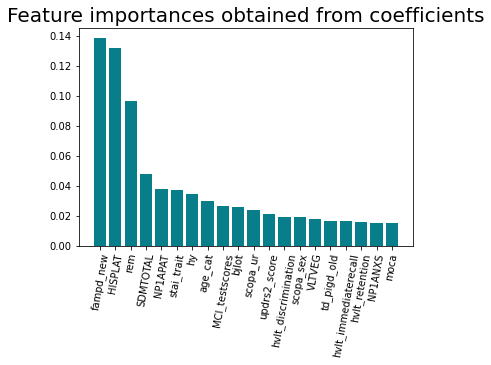

In [25]:
importances = importances.head(20)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation=80)
plt.show()

In [26]:
important_columns = list(importances['Attribute'])

important_columns.remove('HISPLAT')
important_columns

['fampd_new',
 'rem',
 'SDMTOTAL',
 'NP1APAT',
 'stai_trait',
 'hy',
 'age_cat',
 'MCI_testscores',
 'bjlot',
 'scopa_ur',
 'updrs2_score',
 'hvlt_discrimination',
 'scopa_sex',
 'VLTVEG',
 'td_pigd_old',
 'hvlt_immediaterecall',
 'hvlt_retention',
 'NP1ANXS',
 'moca']

In [27]:
X_imp = X_train[important_columns]

In [28]:
X_imp

,fampd_new,rem,SDMTOTAL,NP1APAT,stai_trait,hy,age_cat,MCI_testscores,bjlot,scopa_ur,updrs2_score,hvlt_discrimination,scopa_sex,VLTVEG,td_pigd_old,hvlt_immediaterecall,hvlt_retention,NP1ANXS,moca
1,3.0,1.0,43.0,0.0,20.0,0.0,3,0.0,10.0,1.0,0.0,12.0,0.0,5.0,3.0,32.0,1.000000,0.0,27.0
2551,3.0,0.0,39.0,0.0,21.0,0.0,3,0.0,11.0,6.0,0.0,11.0,0.0,20.0,3.0,33.0,1.000000,0.0,22.0
548,3.0,4.0,46.0,0.0,21.0,0.0,2,0.0,15.0,6.0,0.0,11.0,1.0,11.0,3.0,28.0,0.909091,0.0,26.0
1660,3.0,1.0,51.0,0.0,28.0,0.0,2,1.0,10.0,0.0,3.0,7.0,0.0,9.0,2.0,19.0,1.000000,0.0,26.0
1146,3.0,8.0,50.0,0.0,46.0,0.0,1,0.0,13.0,3.0,1.0,12.0,2.0,14.0,1.0,29.0,1.000000,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,3.0,5.0,54.0,0.0,22.0,0.0,2,0.0,14.0,0.0,1.0,10.0,2.0,9.0,3.0,24.0,0.900000,0.0,29.0
24,3.0,2.0,47.0,0.0,29.0,0.0,2,0.0,13.0,3.0,0.0,12.0,1.0,16.0,3.0,22.0,0.625000,0.0,29.0
2550,3.0,0.0,43.0,0.0,26.0,0.0,3,0.0,7.0,1.0,0.0,11.0,0.0,18.0,3.0,28.0,0.909091,1.0,27.0
3387,3.0,1.0,48.0,0.0,20.0,0.0,2,0.0,13.0,1.0,0.0,12.0,1.0,14.0,3.0,31.0,1.000000,0.0,29.0


In [29]:
X_test = X_test[important_columns]
X_test

,fampd_new,rem,SDMTOTAL,NP1APAT,stai_trait,hy,age_cat,MCI_testscores,bjlot,scopa_ur,updrs2_score,hvlt_discrimination,scopa_sex,VLTVEG,td_pigd_old,hvlt_immediaterecall,hvlt_retention,NP1ANXS,moca
2162,3.0,2.0,47.0,0.0,27.0,0.0,2,0.0,13.0,3.0,0.0,12.0,0.0,13.0,3.0,24.0,1.000000,0.0,29.0
1012,3.0,2.0,47.0,0.0,21.0,0.0,3,0.0,15.0,1.0,2.0,12.0,0.0,22.0,3.0,22.0,1.000000,0.0,27.0
1844,3.0,4.0,39.0,0.0,24.0,0.0,2,0.0,15.0,0.0,0.0,-1.0,0.0,16.0,3.0,23.0,0.888889,0.0,28.0
893,3.0,3.0,46.0,0.0,24.0,2.0,3,0.0,15.0,1.0,2.0,8.0,2.0,11.0,2.0,24.0,0.700000,0.0,22.0
1659,3.0,3.0,45.0,0.0,38.0,0.0,2,0.0,15.0,0.0,2.0,11.0,0.0,12.0,3.0,32.0,0.916667,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,3.0,1.0,41.0,0.0,22.0,0.0,2,0.0,15.0,2.0,0.0,12.0,0.0,17.0,3.0,18.0,1.111111,0.0,25.0
366,3.0,0.0,43.0,0.0,21.0,0.0,2,0.0,12.0,1.0,0.0,11.0,2.0,20.0,3.0,35.0,1.000000,0.0,30.0
1335,3.0,5.0,75.0,0.0,29.0,0.0,1,0.0,14.0,0.0,0.0,11.0,2.0,23.0,2.0,31.0,1.000000,0.0,29.0
1541,3.0,2.0,43.0,0.0,33.0,0.0,2,0.0,15.0,6.0,0.0,12.0,3.0,14.0,3.0,30.0,1.000000,1.0,30.0


In [30]:
temp_X = pd.concat([X_test, y_test],axis = 1)
temp_X = temp_X.dropna()
X_test = temp_X.drop('APPRDX', axis = 1)
y_test = temp_X['APPRDX']

In [31]:
comparisons([X_imp, y_train, X_test, y_test])

+---------------------+------------+--------------------+-----------------+
| Model               |   Accuracy | Confusion Matrix   |   ROC-AUC Score |
+=====================+============+====================+=================+
| Logistic Regression |    92.511  | [[199   6]         |        0.735366 |
|                     |            |  [ 11  11]]        |                 |
+---------------------+------------+--------------------+-----------------+
| SVM                 |    91.1894 | [[204   1]         |        0.565743 |
|                     |            |  [ 19   3]]        |                 |
+---------------------+------------+--------------------+-----------------+
| Random Forest       |    93.3921 | [[201   4]         |        0.740244 |
|                     |            |  [ 11  11]]        |                 |
+---------------------+------------+--------------------+-----------------+
| KNN                 |    93.8326 | [[202   3]         |        0.742683 |
|           

#### With oversampling

In [32]:
X_imp, y_train = oversampling(X_imp, y_train)
comparisons([X_imp, y_train, X_test, y_test])

+---------------------+------------+--------------------+-----------------+
| Model               |   Accuracy | Confusion Matrix   |   ROC-AUC Score |
+=====================+============+====================+=================+
| Logistic Regression |    81.9383 | [[170  35]         |        0.778271 |
|                     |            |  [  6  16]]        |                 |
+---------------------+------------+--------------------+-----------------+
| SVM                 |    87.2247 | [[180  25]         |        0.848115 |
|                     |            |  [  4  18]]        |                 |
+---------------------+------------+--------------------+-----------------+
| Random Forest       |    91.1894 | [[196   9]         |        0.728049 |
|                     |            |  [ 11  11]]        |                 |
+---------------------+------------+--------------------+-----------------+
| KNN                 |    85.022  | [[174  31]         |        0.856208 |
|           